# LO3-Classification
### Qa Load and display the MNIST data

In [1]:
import numpy as np

def MNIST_GetDataSet(action,print):
    if action==1:
        from sklearn.datasets import fetch_openml
        # Load data from https://www.openml.org/d/554
        X, y = fetch_openml('mnist_784',return_X_y=True, cache=True) # Returns two distinct values, saves locally to avoid reloading
        # Convert to [0;1] via scaling 
        X = X / 255.
        if print==1:
            %matplotlib inline
            def MNIST_PlotDigit(data):
             import matplotlib
             import matplotlib.pyplot as plt
             image = data.reshape(28, 28)
             plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
             plt.axis("off")
        # Force the first row of X to be a generic array instead of pandas formatting, also serves as a test for working import of data.
             MNIST_PlotDigit(X.to_numpy()[0])
        else:
           pass

        return X, y

    else:
        pass

MNIST_GetDataSet(1,1)


(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
        pixel1

### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

In [2]:
# 1. Imports
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
SGDC = SGDClassifier()
X, y = MNIST_GetDataSet(1,0)

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

X.shape=(70000, 784)
X.shape=(70000, 784)


Training the model...
Found 780 correct 5s and 182 false positives.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


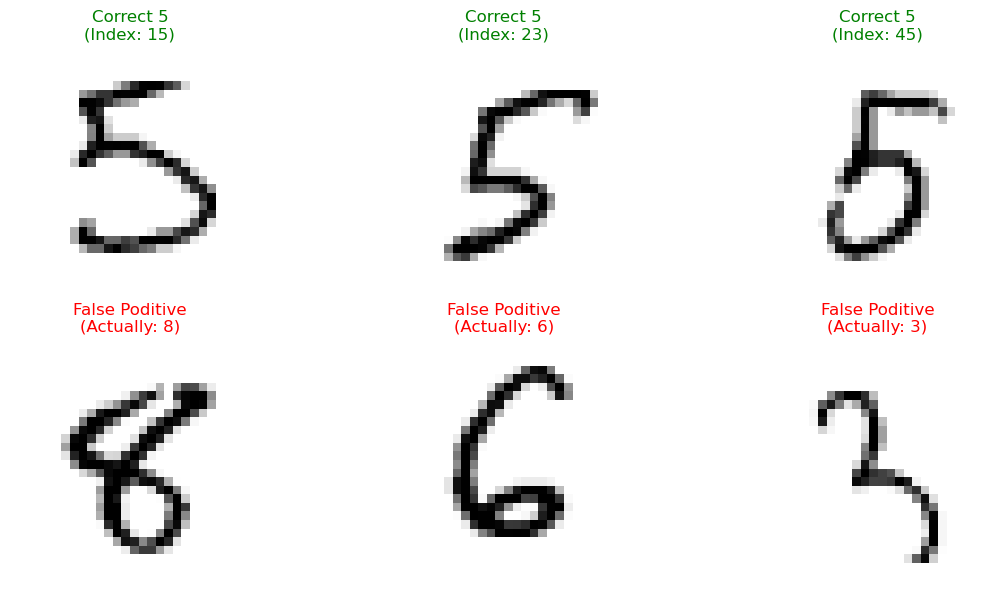

In [ ]:
#Split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

y_train_5 = (y_train == '5') 
y_test_5 = (y_test == '5')

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

#Fit
print("Training the model...")
SGD = SGDC.fit(X_train, y_train_5)

#Predict
y_test_pred = SGDC.predict(X_test_np)


import matplotlib.pyplot as plt


X_clean = X_test.to_numpy()
y_clean = y_test_5.to_numpy()
pred_clean = y_test_pred  # This is already a numpy array


tp_indices = np.where((pred_clean == True) & (y_clean == True))[0]

fp_indices = np.where((pred_clean == True) & (y_clean == False))[0]

print(f"Found {len(tp_indices)} correct 5s and {len(fp_indices)} false positives.")

# --- 3. Plotting Function ---
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap = plt.cm.binary, interpolation="nearest")
    ax.axis("off")

plt.figure(figsize=(12, 6))

for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    if i < len(tp_indices):
        idx = tp_indices[i]
        plot_digit(X_clean[idx], ax)
        ax.set_title(f"Correct 5\n(Index: {idx})", color="green")

for i in range(3):
    ax = plt.subplot(2, 3, i + 4)
    if i < len(fp_indices):
        idx = fp_indices[i]
        plot_digit(X_clean[idx], ax)
        original_label = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
        ax.set_title(f"False Positive\n(Actually: {original_label})", color="red")

plt.tight_layout()
plt.show()

### Qc Implement a dummy binary classifier

In [ ]:
from sklearn.base import BaseEstimator

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        # This model doesn't "learn" anything, so fit does nothing.
        # It just returns self to be compatible with sklearn pipelines.
        return self
    
    def predict(self, X):
        # Create a list of "False" (zeros) that is the same length as X
        return np.zeros((len(X), 1), dtype=bool)
    
# Running and evaluating
from sklearn.metrics import accuracy_score

# Create the model
dummy_clf = DummyClassifier()

# "Train" it (it learns nothing)
dummy_clf.fit(X_train, y_train_5)

# (This will just generate 10,000 "False" values)
y_dummy_pred = dummy_clf.predict(X_test)

# We are comparing our "All False" guesses against the Real answers
score = accuracy_score(y_test_5, y_dummy_pred)

print(f"Dummy Classifier Accuracy: {score}")

Dummy Classifier Accuracy: 0.9108


So we see a classifier with an accuracy of over 91%, incredible. One of the best classifiers I have ever made. Lets hope it does not need to predict anything with a rare occurrence like cancer or the written number 6 next time.

### Qd Multiclass Classification

In [5]:
# Random forrest multiclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the model
rf_clf = RandomForestClassifier(n_estimators=10)

# Train (Fit)
print("Training Random Forest...")
rf_clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# SVM multiclassifier
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(dual="auto")

print("Training Linear SVM...")
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")


# Dummy classifier on full set

from sklearn.metrics import accuracy_score

# Create the model
dummy_clf = DummyClassifier()

# "Train" it (it learns nothing)
dummy_clf.fit(X_train, y_train)

# (This will just generate 10,000 "False" values)
y_dummy_pred = dummy_clf.predict(X_test)
print("y_dummy_pred = ",y_dummy_pred)

# We are comparing our "All False" guesses against the Real answers
score = accuracy_score(y_test, y_dummy_pred)

print(f"Dummy Classifier Accuracy: {score}")

Training Random Forest...
Random Forest Accuracy: 0.9485
Training Linear SVM...
SVM Accuracy: 0.9183
y_dummy_pred =  [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
Dummy Classifier Accuracy: 0.0


With the random forrest classifier getting an accuracy of 0.946 and that with n=10 is quite impressive, it even does it faster than the linear SVM.
The dummy classifier, since it always predicts "False" and there is bound to be a number drawn, we get an accuracy of 0, but it does run!

### Qe Conclusion
It is clear that it matters greatly how one chooses to organize one's data and what critereas are measured, remember that a broken clock is right twice a day. 
